<h1>Решение соревнования kaggle "Language Detection"</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score

In [2]:
seed = 42

In [4]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [5]:
train_df.shape, test_df.shape

((3159633, 2), (2784634, 2))

In [6]:
train_df.head(15)

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
1,"Můžete si ji pronajmout , vzít na splátky , ko...",cs
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,"Det är ytterligare bevis , men ändå — Jag krit...",sv
4,كان الأمر لا يصدق .,ar
5,"Na primjer , pjesnik ga opisuje ovako .",hr
6,Semua rerumputan itu sekarang menutupi tanah s...,id
7,Det är en enorm utmaning för oss att göra det .,sv
8,Ono što ćete vidjeti - trebat ćete skočiti ovd...,hr
9,( Alqışlar ) Excel-dən istifadə etmişəm .,az


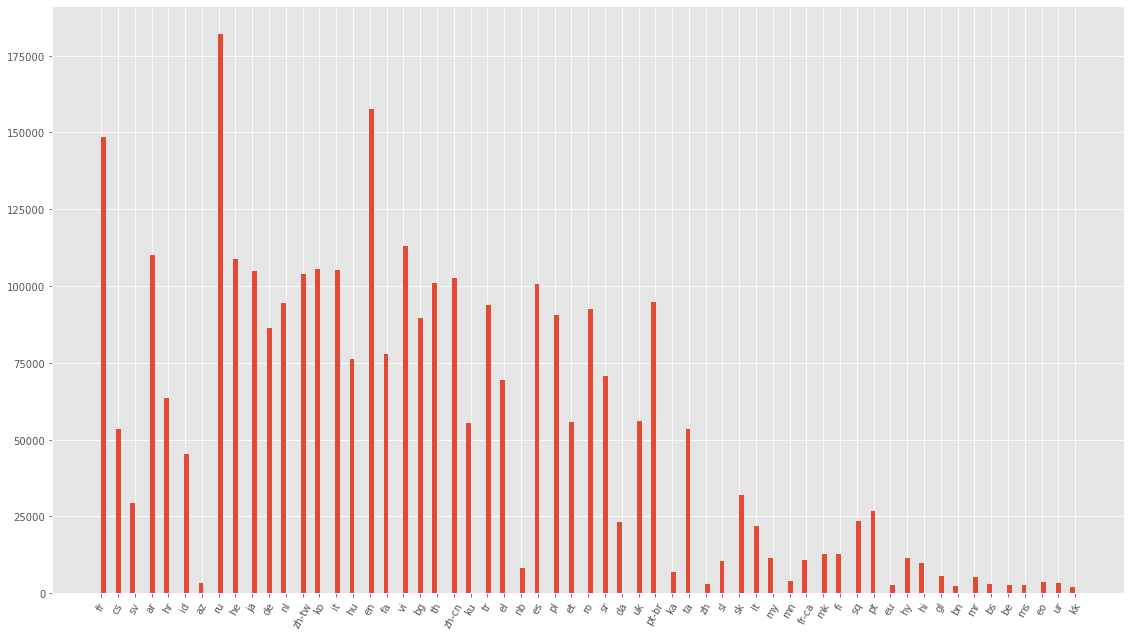

In [12]:
train_df.language.hist(bins=200, figsize=(19.20, 10.80), xrot=60)

In [14]:
train_df.isna().nunique()

sentence    1
language    1
dtype: int64

In [26]:
train_df.sentence[train_df.language == 'en'].sample(5)

2818334    що це тому ми чи дуже які щоб дякую якщо було ...
2379984    що це тому ми чи дуже які щоб дякую якщо було ...
692754     More than a profile , it means you can selecti...
110269     It is a more hopeful , it is a more human , an...
2200153    All I got were empty promises and disappointme...
Name: sentence, dtype: object